## Vaibhav Kumar

### Objective - Differentiate between real and fake news using a Python project applying a PassiveAggressiveClassifier.

### Task: Detecting Fake News

### Dataset Link: https://365datascience.com/resources/downloadables/Python-Projects-Detecting-Fake-News.zip

####  Importing necessary libraries

In [43]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split ,cross_val_score ,GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

####  Loaded  the dataset

In [13]:
news_data= pd.read_csv("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Devtern\\Task 1\\Data\\news.csv")
news_data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
news_data = news_data.rename(columns={'Unnamed: 0': 'word_count'})

In [15]:
news_data.head(3)

,word_count,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL


#### Exploratory data analysis

In [16]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   word_count  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [17]:
news_data.shape

(6335, 4)

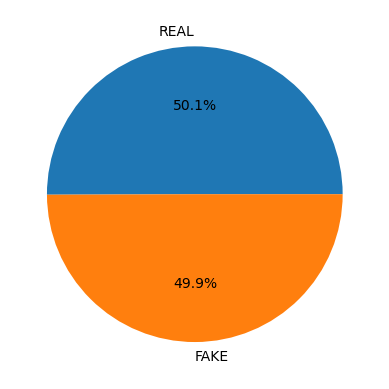

In [18]:
news_data["label"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("")
plt.show()

#### we can say that in the dataset we 50.1% of news are real and rest 49.9% is fake.
Here we have a balanced dataset

#### Separated the target variable from features. 

In [19]:
y= news_data.label
y.head(5)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

#### Building the model

In [46]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], y, test_size= 0.4, random_state= 7)

In [23]:
#Then we’ll initialize TfidfVectorizer with English stop words
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Created a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)

In [24]:
pipe1 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('classifier', PassiveAggressiveClassifier(max_iter=50))
])

In [25]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('classifier', PassiveAggressiveClassifier(max_iter=50))])

In [28]:
train_preds = pipe1.predict(x_train)
test_preds = pipe1.predict(x_test)

####  Evaluating the model's accuracy

In [29]:
train_acc = accuracy_score(train_preds, y_train)
test_acc = accuracy_score(test_preds, y_test)
print(f"Train Accuracy:: {train_acc:.2f} \n Test Accuracy:: {test_acc:.2f}")

Train Accuracy:: 1.00 
 Test Accuracy:: 0.93


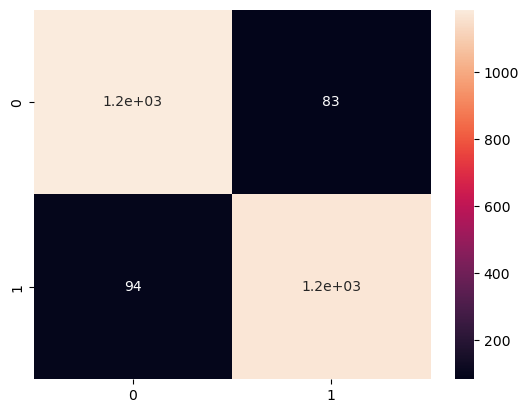

In [53]:
#ploting confusion matrix
matrix= confusion_matrix(y_test,test_preds, labels=['FAKE','REAL'])
sns.heatmap(matrix, annot=True)
plt.show()

In [54]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,test_preds)
Accuracy*100

93.01499605367009

#### The model's accuracy is 93%

In [55]:
Report= classification_report(y_test, test_preds)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



#### Cross Validation and Hyperparameter Tuning using GridSearchCV

In [56]:
cv_score =cross_val_score(estimator=pipe1,X=x_train,y=y_train,cv=3)
print("Croess validation score ::",cv_score.mean())

Croess validation score :: 0.925019731649566


#### Orignal accuracy is 92.5%

#### Hyperparameter tuning to improve accuracy of model.

In [62]:
pipe1_param_grid ={
    "tfidf__max_df":[0.6,0.7,0.8,0.9],
    "classifier__max_iter":[44,45,50,55]
}

In [63]:
grid_search = GridSearchCV(estimator= pipe1, param_grid=pipe1_param_grid)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.7,
                                                        stop_words='english')),
                                       ('classifier',
                                        PassiveAggressiveClassifier(max_iter=50))]),
             param_grid={'classifier__max_iter': [44, 45, 50, 55],
                         'tfidf__max_df': [0.6, 0.7, 0.8, 0.9]})

In [65]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_iter,param_tfidf__max_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,3.065028,0.070848,0.710570,0.028647,50,0.8,"{'classifier__max_iter': 50, 'tfidf__max_df': ...",0.935611,0.938158,0.939474,0.926316,0.930263,0.933964,0.004957,1
11,3.084809,0.026472,0.736952,0.056782,50,0.9,"{'classifier__max_iter': 50, 'tfidf__max_df': ...",0.931669,0.930263,0.931579,0.927632,0.930263,0.930281,0.001458,2
8,3.231820,0.184826,0.849540,0.197784,50,0.6,"{'classifier__max_iter': 50, 'tfidf__max_df': ...",0.931669,0.921053,0.935526,0.926316,0.936842,0.930281,0.005889,3
1,3.087005,0.055364,0.722538,0.020638,44,0.7,"{'classifier__max_iter': 44, 'tfidf__max_df': ...",0.932983,0.934211,0.931579,0.922368,0.930263,0.930281,0.004172,4
13,3.173385,0.111546,0.725766,0.066580,55,0.7,"{'classifier__max_iter': 55, 'tfidf__max_df': ...",0.932983,0.931579,0.930263,0.921053,0.932895,0.929754,0.004463,5


#### Updateing the hyperparameters.

In [74]:
pipe1 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.8)),
    ('classifier', PassiveAggressiveClassifier(max_iter=50))
])

In [75]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', PassiveAggressiveClassifier(max_iter=50))])

In [77]:
train_preds = pipe1.predict(x_train)
test_preds = pipe1.predict(x_test)

In [78]:
train_acc = accuracy_score(train_preds, y_train)
test_acc = accuracy_score(test_preds, y_test)
print(f"Train Accuracy:: {train_acc:.2f} \n Test Accuracy:: {test_acc:.2f}")

Train Accuracy:: 1.00 
 Test Accuracy:: 0.93


In [79]:
cv_score =cross_val_score(estimator=pipe1,X=x_train,y=y_train,cv=3)
print("Croess validation score ::",cv_score.mean())

Croess validation score :: 0.9271244409365956


#### Increased our accuracy from 92.5% to 92.7%.

In [81]:
Report= classification_report(y_test, test_preds)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534

